<h1 style = "font-size:60px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Stroke Prediction with Neural Networks</h1>

<img src="https://media.istockphoto.com/photos/blood-clot-or-thrombus-blocking-the-red-blood-cells-stream-within-an-picture-id1297034329" height=400px width=800px>

<h1 style = "font-size:40px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Table of Contents</h1>

* [Problem Statement](#1)
    
* [Project Objectives](#2)
    
* [Importing Libraries and Read In Dataset](#3)

* [Visualizing the Data](#4)
    
* [Data Preprocessing](#5) 

* [Creating the Neural Network](#6)

* [Conclusions](#7)

<a id="1"></a>
<h1 style = "font-size:50px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Problem Statement</h1>
<p>
    According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
    </p>
<p>Source - <a href="https://www.kaggle.com/fedesoriano/stroke-prediction-dataset">Kaggle - Stroke Prediction Dataset</a></p>

<a id="2"></a>
<h1 style = "font-size:50px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Project Objectives</h1>

<ul>
    <li>Determine what makes a person at risk for stroke</li>
    <li>Create a machine learning model to perform early detection of stroke for patients</li> 
</ul>


<a id="3"></a>
<h1 style = "font-size:50px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Importing Libraries and Read in Dataset</h1>

In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #data viz
from matplotlib.gridspec import GridSpec #data viz
import seaborn as sns #data viz
!pip install pywaffle
from pywaffle import Waffle #data viz
from sklearn.compose import ColumnTransformer #data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler #data preprocessing
from sklearn.impute import KNNImputer #handle missing values
from imblearn.over_sampling import SMOTE #balance classes
from sklearn.model_selection import train_test_split #train/test dataset
from tensorflow.keras import layers, models #neural network architecture
from tensorflow.keras.callbacks import EarlyStopping #regularization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras #keras
import tensorflow as tf #tensorflow
from sklearn.metrics import accuracy_score, recall_score ,precision_score, f1_score#evaluate model

     |████████████████████████████████| 565 kB 1.9 MB/s            


In [2]:
#Read In Dataset
pd.set_option('display.max_columns', None)
stroke_data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv', index_col='id')
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h3>About Each Attribute</h3>
<ul>
<li>id: unique identifier</li>
<li>gender: "Male", "Female" or "Other"</li>
<li>age: age of the patient</li>
<li>hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension</li>
<li>heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</li>
<li>ever_married: "No" or "Yes"</li>
<li>work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"</li>
<li>Residence_type: "Rural" or "Urban"</li>
<li>avg_glucose_level: average glucose level in blood</li>
<li>bmi: body mass index</li>
<li>smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*</li>
<li>stroke: 1 if the patient had a stroke or 0 if not</li>
</ul>
<p>*Note: "Unknown" in smoking_status means that the information is unavailable for this patient</p>
<p>Source - <a href="https://www.kaggle.com/fedesoriano/stroke-prediction-dataset">Kaggle - Stroke Prediction Dataset</a></p>

<a id="4"></a>
<h1 style = "font-size:50px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Visualizing the Data</h1>

In [3]:
#displays stats about the numerical features
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
#displays stats about the catagorical features
stroke_data.describe(exclude = ['float', 'int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [5]:
#displays amount of null values for each column
print(stroke_data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<h5>BMI is the only column that has missing values. This will be handled later with KNN Imputer.</h5>

In [6]:
#display percent of dataset with stroke
perc_dis = stroke_data['stroke'].sum() / len(stroke_data)
print('Percent of patients in dataset with stroke:', round(perc_dis, 4))

Percent of patients in dataset with stroke: 0.0487


<h5>Only about 5% of the patients in the dataset experienced a stroke. While this may be good news for the patients, it makes creating our model more difficult. Later I will need to use SMOTE to balance the dataset.</h5>

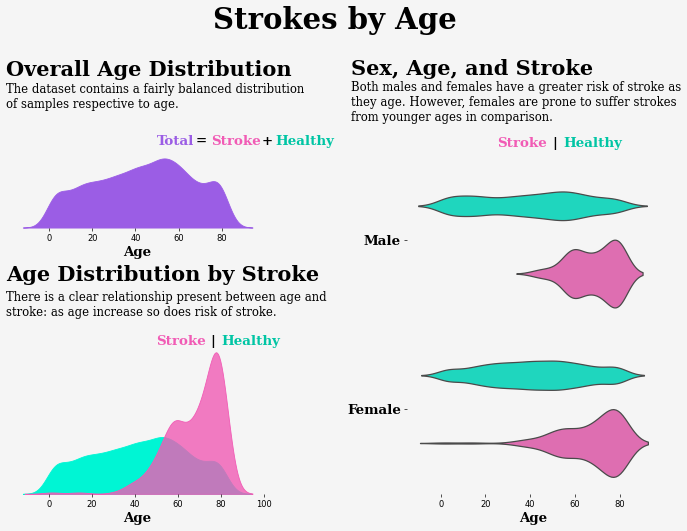

In [7]:
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['#00f5d4','#f15bb5']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 6:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot('age', data=stroke_data, ax=ax1, shade=True, color='#9b5de5', alpha=1)
ax1.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.text(-20, 0.035, 'Overall Age Distribution', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax1.text(-20, 0.0275, 'The dataset contains a fairly balanced distribution \nof samples respective to age.',
         {'font':'Serif', 'color': 'black', 'size':14})
ax1.text(50, 0.019, 'Total',{'font':'Serif', 'size':'16','color': '#9b5de5','weight':'bold'})
ax1.text(68, 0.019, '=',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(75, 0.019, 'Stroke',{'font':'Serif', 'size':'16','color': '#f15bb5','weight':'bold'})
ax1.text(98.5, 0.019, '+',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(105, 0.019, 'Healthy',{'font':'Serif', 'size':'16','color': '#00c5a4','weight':'bold'})

#-------Ax 2------------------------------------------------
sns.kdeplot('age', data=stroke_data[stroke_data.stroke==0], ax=ax2, shade=True, 
            color='#00f5d4', alpha=1)
sns.kdeplot('age', data=stroke_data[stroke_data.stroke==1], ax=ax2, shade=True, 
            color='#f15bb5', alpha=0.8)
ax2.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(-20, 0.06, 'Age Distribution by Stroke', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax2.text(-20, 0.05, 'There is a clear relationship present between age and\nstroke: as age increase so does ' +\
                         'risk of stroke.',
         {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(50, 0.042,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax2.text(75, 0.042,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(80, 0.042,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})

#-------Ax 3------------------------------------------------
ax3.get_yaxis().set_visible(True)
sns.violinplot(x='age', y='gender', data=stroke_data[stroke_data.gender!='Other'],
               hue='stroke', ax=ax3, aspect=2, inner=None)
ax3.set_yticklabels( labels = ['Male', 'Female'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_ylabel('')
ax3.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.get_legend().remove()
ax3.text(-40, -0.975, 'Sex, Age, and Stroke', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax3.text(-40, -0.7, 'Both males and females have a greater risk of stroke as\nthey age. However, ' +\
         'females are prone to suffer strokes\nfrom younger ages in comparison.', 
         {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(25,-0.55,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax3.text(50,-0.55,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.text(55,-0.55,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})
#---------------------------------------------------------------
fig.text(0.19, 0.9, 'Strokes by Age', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()


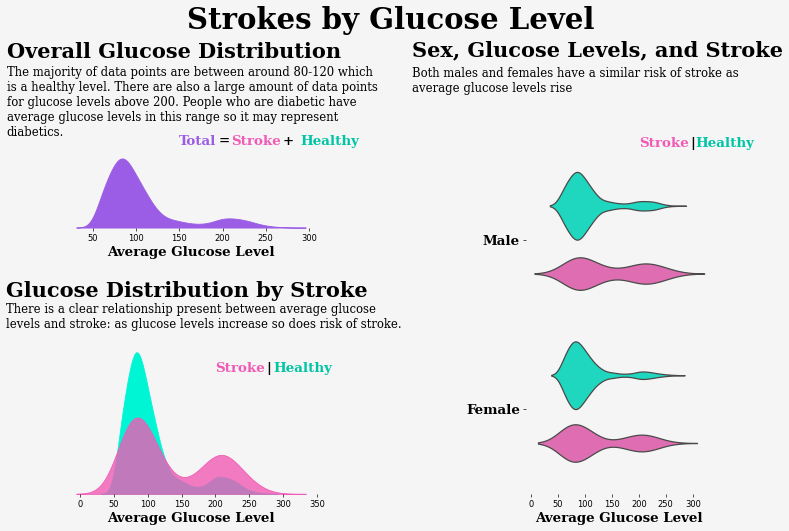

In [8]:
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['#00f5d4','#f15bb5']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot('avg_glucose_level', data=stroke_data, ax=ax1, shade=True, color='#9b5de5', alpha=1)
ax1.set_xlabel('Average Glucose Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.text(-50, 0.039, 'Overall Glucose Distribution', 
         {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax1.text(-50, 0.021, 'The majority of data points are between around 80-120 which\nis a healthy level. ' +\
         'There are also a large amount of data points\nfor glucose levels above 200. ' +\
         'People who are diabetic have\naverage glucose levels in this range so it may represent\ndiabetics.',
         {'font':'Serif', 'color': 'black', 'size':14})
ax1.text(150, 0.019, 'Total',{'font':'Serif', 'size':'16','color': '#9b5de5','weight':'bold'})
ax1.text(195, 0.019, '=',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(210, 0.019, 'Stroke',{'font':'Serif', 'size':'16','color': '#f15bb5','weight':'bold'})
ax1.text(270, 0.019, '+',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(290, 0.019, 'Healthy',{'font':'Serif', 'size':'16','color': '#00c5a4','weight':'bold'})

#-------Ax 2------------------------------------------------
sns.kdeplot('avg_glucose_level', data=stroke_data[stroke_data.stroke==0], ax=ax2, shade=True, 
            color='#00f5d4', alpha=1)
sns.kdeplot('avg_glucose_level', data=stroke_data[stroke_data.stroke==1], ax=ax2, shade=True, 
            color='#f15bb5', alpha=0.8)
ax2.set_xlabel('Average Glucose Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(-109, 0.0225, 'Glucose Distribution by Stroke', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax2.text(-109, 0.019, 'There is a clear relationship present between average glucose\nlevels and stroke: as glucose levels' +\
         ' increase so does risk of stroke.',
         {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(200, 0.014,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax2.text(275, 0.014,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(285, 0.014,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})

#-------Ax 3------------------------------------------------
ax3.get_yaxis().set_visible(True)
sns.violinplot(x='avg_glucose_level', y='gender', data=stroke_data[stroke_data.gender!='Other'],
               hue='stroke', ax=ax3, aspect=2, inner=None)
ax3.set_yticklabels( labels = ['Male', 'Female'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_ylabel('')
ax3.set_xlabel('Average Glucose Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.get_legend().remove()
ax3.text(-220, -1.085, 'Sex, Glucose Levels, and Stroke', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax3.text(-220, -0.875, 'Both males and females have a similar risk of stroke as\naverage glucose levels rise', 
         {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(200,-0.55,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax3.text(295,-0.55,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.text(305,-0.55,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})
#---------------------------------------------------------------
fig.text(0.135, 0.9, 'Strokes by Glucose Level', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

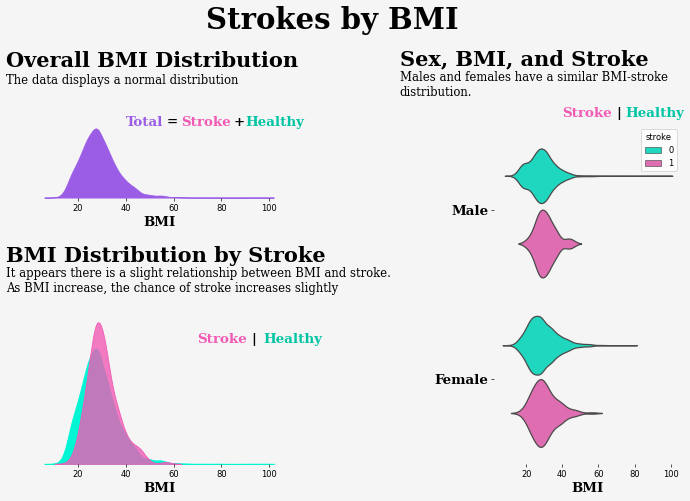

In [9]:
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['#00f5d4','#f15bb5']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot('bmi', data=stroke_data, ax=ax1, shade=True, color='#9b5de5', alpha=1)
ax1.set_xlabel('BMI', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.text(-10, 0.11, 'Overall BMI Distribution', 
         {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax1.text(-10, 0.095, 'The data displays a normal distribution',
         {'font':'Serif', 'color': 'black', 'size':14})
ax1.text(40, 0.06, 'Total',{'font':'Serif', 'size':'16','color': '#9b5de5','weight':'bold'})
ax1.text(57, 0.06, '=',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(63, 0.06, 'Stroke',{'font':'Serif', 'size':'16','color': '#f15bb5','weight':'bold'})
ax1.text(85, 0.06, '+',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(90, 0.06, 'Healthy',{'font':'Serif', 'size':'16','color': '#00c5a4','weight':'bold'})

#-------Ax 2------------------------------------------------
sns.kdeplot('bmi', data=stroke_data[stroke_data.stroke==0], ax=ax2, shade=True, 
            color='#00f5d4', alpha=1)
sns.kdeplot('bmi', data=stroke_data[stroke_data.stroke==1], ax=ax2, shade=True, 
            color='#f15bb5', alpha=0.8)
ax2.set_xlabel('BMI', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(-10, 0.1, 'BMI Distribution by Stroke', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax2.text(-10, 0.085, 'It appears there is a slight relationship between BMI and stroke.\n' +\
         'As BMI increase, the chance of stroke increases slightly',
         {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(70, 0.06,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax2.text(92.5, 0.06,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(97.5, 0.06,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})

#-------Ax 3------------------------------------------------
ax3.get_yaxis().set_visible(True)
sns.violinplot(x='bmi', y='gender', data=stroke_data[stroke_data.gender!='Other'],
               hue='stroke', ax=ax3, aspect=2, inner=None)
ax3.set_yticklabels( labels = ['Male', 'Female'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_ylabel('')
ax3.set_xlabel('BMI', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.text(-50, -0.85, 'Sex, BMI, and Stroke', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax3.text(-50, -0.67, 'Males and females have a similar BMI-stroke\ndistribution.', 
         {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(40,-0.55,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax3.text(70,-0.55,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.text(75,-0.55,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})
#---------------------------------------------------------------
fig.text(0.17, 0.85, 'Strokes by BMI', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


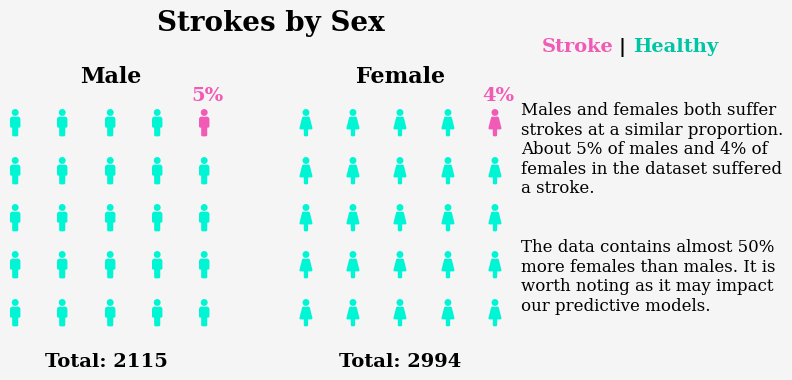

In [10]:
males_total = stroke_data.groupby('gender').gender.count()['Male']
per_males_healthy = stroke_data[stroke_data.stroke==0].groupby('gender').gender.count()['Male'] / males_total
per_males_stroke = stroke_data[stroke_data.stroke==1].groupby('gender').gender.count()['Male'] / males_total
males_healthy = round(per_males_healthy * 25, 0)
males_stroke = round(per_males_stroke * 25, )
females_total = stroke_data.groupby('gender').gender.count()['Female']
per_females_healthy = stroke_data[stroke_data.stroke==0].groupby('gender').gender.count()['Female'] / females_total
per_females_stroke = stroke_data[stroke_data.stroke==1].groupby('gender').gender.count()['Female'] / females_total
females_healthy = round(per_females_healthy * 25, 0)
females_stroke = round(per_females_stroke * 25, 0)



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f5f5f5',dpi = 100,
                 
                 plots = {121: #plots males with and without stroke
                          {     
                           'rows':5,
                           'columns': 5,
                           'values' : [males_healthy, males_stroke],
                            'colors' : ['#00f5d4','#f15bb5'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 : #plots females with and without stroke
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[females_healthy, females_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)

fig.text(0.35, 0.75, 'Strokes by Sex', {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24, 0.675, 'Male', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.19, 0.27, 'Total: ' + str(males_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.635, 0.675, 'Female', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.61, 0.27, 'Total: ' + str(females_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.4, 0.65, str(int(per_males_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.815, 0.65, str(int(per_females_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(.9, 0.72, 'Stroke', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(1.01, 0.72, '|', {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(1.03, 0.72, 'Healthy', {'font':'Serif', 'weight':'bold','color': '#00c5a4', 'size':14})
fig.text(.87, 0.35, 
         'Males and females both suffer\nstrokes at a similar proportion.\n' +\
         'About 5% of males and 4% of\nfemales in the dataset suffered\na stroke.' +\
         '\n\n\nThe data contains almost 50%\nmore females than males. It is\n' +\
         'worth noting as it may impact\nour predictive models.', 
         {'font':'Serif', 'weight':'normal','color': 'black', 'size':12})

plt.show()

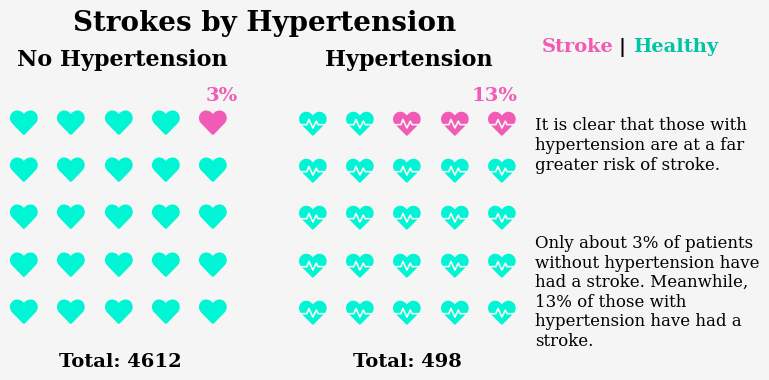

In [11]:
no_hypertension_total = stroke_data.groupby('hypertension').hypertension.count()[0]
per_no_hypertension_healthy = stroke_data[stroke_data.stroke==0].groupby('hypertension').hypertension.count()[0] / no_hypertension_total
per_no_hypertension_stroke = stroke_data[stroke_data.stroke==1].groupby('hypertension').hypertension.count()[0] / no_hypertension_total
no_hypertension_healthy = round(per_no_hypertension_healthy * 25, 0)
no_hypertension_stroke = round(per_no_hypertension_stroke * 25, )
hypertension_total = stroke_data.groupby('hypertension').hypertension.count()[1]
per_hypertension_healthy = stroke_data[stroke_data.stroke==0].groupby('hypertension').hypertension.count()[1] / hypertension_total
per_hypertension_stroke = stroke_data[stroke_data.stroke==1].groupby('hypertension').hypertension.count()[1] / hypertension_total
hypertension_healthy = round(per_hypertension_healthy * 25, 0)
hypertension_stroke = round(per_hypertension_stroke * 25, 0)



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f5f5f5',dpi = 100,
                 
                 plots = {121:
                          {     
                           'rows':5,
                           'columns': 5,
                           'values' : [no_hypertension_healthy, no_hypertension_stroke],
                            'colors' : ['#00f5d4','#f15bb5'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'heart',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 : 
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[hypertension_healthy, hypertension_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'heartbeat',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)

fig.text(0.23, 0.75, 'Strokes by Hypertension', {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.15, 0.7, 'No Hypertension', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.21, 0.27, 'Total: ' + str(no_hypertension_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.59, 0.7, 'Hypertension', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.63, 0.27, 'Total: ' + str(hypertension_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.42, 0.65, str(int(per_no_hypertension_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.8, 0.65, str(int(per_hypertension_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(.9, 0.72, 'Stroke', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(1.01, 0.72, '|', {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(1.03, 0.72, 'Healthy', {'font':'Serif', 'weight':'bold','color': '#00c5a4', 'size':14})
fig.text(.89, 0.3, 
         'It is clear that those with\nhypertension are at a far\ngreater risk of stroke.\n' +\
         '\n\n\nOnly about 3% of patients\nwithout hypertension have\nhad a stroke. Meanwhile,\n' +\
         '13% of those with\nhypertension have had a\nstroke.', 
         {'font':'Serif', 'weight':'normal','color': 'black', 'size':12})

plt.show()

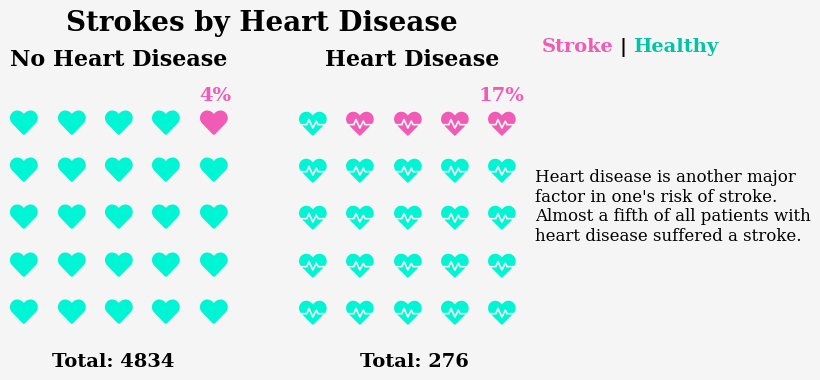

In [12]:
no_heart_disease_total = stroke_data.groupby('heart_disease').heart_disease.count()[0]
per_no_heart_disease_healthy = stroke_data[stroke_data.stroke==0].groupby('heart_disease').heart_disease.count()[0] / no_heart_disease_total
per_no_heart_disease_stroke = stroke_data[stroke_data.stroke==1].groupby('heart_disease').heart_disease.count()[0] / no_heart_disease_total
no_heart_disease_healthy = round(per_no_heart_disease_healthy * 25, 0)
no_heart_disease_stroke = round(per_no_heart_disease_stroke * 25, )
heart_disease_total = stroke_data.groupby('heart_disease').heart_disease.count()[1]
per_heart_disease_healthy = stroke_data[stroke_data.stroke==0].groupby('heart_disease').heart_disease.count()[1] / heart_disease_total
per_heart_disease_stroke = stroke_data[stroke_data.stroke==1].groupby('heart_disease').heart_disease.count()[1] / heart_disease_total
heart_disease_healthy = round(per_heart_disease_healthy * 25, 0)
heart_disease_stroke = round(per_heart_disease_stroke * 25, 0)



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f5f5f5',dpi = 100,
                 
                 plots = {121: 
                          {     
                           'rows':5,
                           'columns': 5,
                           'values' : [no_heart_disease_healthy, no_heart_disease_stroke],
                            'colors' : ['#00f5d4','#f15bb5'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'heart',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 : 
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[heart_disease_healthy, heart_disease_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'heartbeat',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)

fig.text(0.22, 0.75, 'Strokes by Heart Disease', {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.14, 0.7, 'No Heart Disease', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.2, 0.27, 'Total: ' + str(no_heart_disease_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.59, 0.7, 'Heart Disease', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.64, 0.27, 'Total: ' + str(heart_disease_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.41, 0.65, str(int(per_no_heart_disease_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.81, 0.65, str(int(per_heart_disease_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(.9, 0.72, 'Stroke', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(1.01, 0.72, '|', {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(1.03, 0.72, 'Healthy', {'font':'Serif', 'weight':'bold','color': '#00c5a4', 'size':14})
fig.text(.89, 0.45, 
         'Heart disease is another major\nfactor in one\'s risk of stroke.' +\
         '\nAlmost a fifth of all patients with\nheart disease ' +\
         'suffered a stroke.', 
         {'font':'Serif', 'weight':'normal','color': 'black', 'size':12})

plt.show()

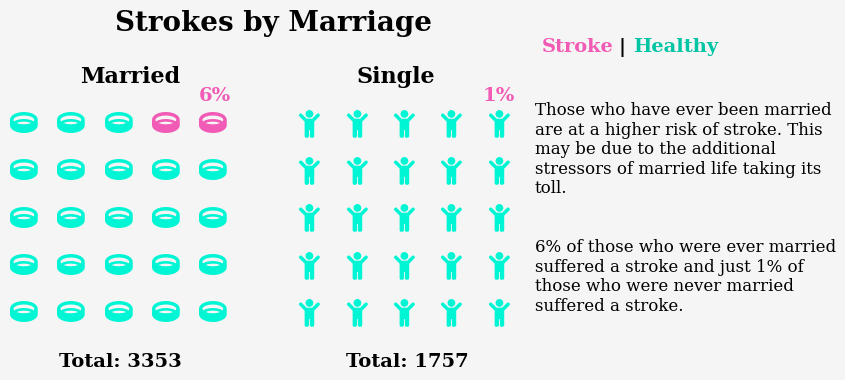

In [13]:
married_total = stroke_data.groupby('ever_married').ever_married.count()['Yes']
per_married_healthy = stroke_data[stroke_data.stroke==0].groupby('ever_married').ever_married.count()['Yes'] / married_total
per_married_stroke = stroke_data[stroke_data.stroke==1].groupby('ever_married').ever_married.count()['Yes'] / married_total
married_healthy = round(per_married_healthy * 25, 0)
married_stroke = round(per_married_stroke * 25, )
not_married_total = stroke_data.groupby('ever_married').ever_married.count()['No']
per_not_married_healthy = stroke_data[stroke_data.stroke==0].groupby('ever_married').ever_married.count()['No'] / not_married_total
per_not_married_stroke = stroke_data[stroke_data.stroke==1].groupby('ever_married').ever_married.count()['No'] / not_married_total
not_married_healthy = round(per_not_married_healthy * 25, 0)
not_married_stroke = round(per_not_married_stroke * 25, 0)



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f5f5f5',dpi = 100,
                 
                 plots = {121: 
                          {     
                           'rows':5,
                           'columns': 5,
                           'values' : [married_healthy, married_stroke],
                            'colors' : ['#00f5d4','#f15bb5'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'ring',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 : 
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[not_married_healthy, not_married_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'child',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)

fig.text(0.29, 0.75, 'Strokes by Marriage', {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24, 0.675, 'Married', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.21, 0.27, 'Total: ' + str(married_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.635, 0.675, 'Single', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.62, 0.27, 'Total: ' + str(not_married_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.41, 0.65, str(int(per_married_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.815, 0.65, str(int(per_not_married_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(.9, 0.72, 'Stroke', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(1.01, 0.72, '|', {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(1.03, 0.72, 'Healthy', {'font':'Serif', 'weight':'bold','color': '#00c5a4', 'size':14})
fig.text(.89, 0.35, 
         'Those who have ever been married\nare at a higher risk of stroke. This\nmay ' +\
         'be due to the additional\nstressors of married life taking its\ntoll.' +\
         '\n\n\n6% of those who were ever married\nsuffered a stroke and just 1% of\nthose ' +\
         'who were never married\nsuffered a stroke.', 
         {'font':'Serif', 'weight':'normal','color': 'black', 'size':12})

plt.show()

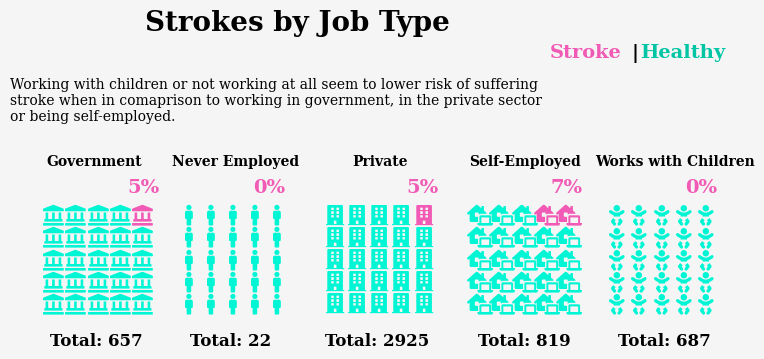

In [14]:
govt_job_total = stroke_data.groupby('work_type').work_type.count()['Govt_job']
per_govt_job_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['Govt_job'] / govt_job_total
per_govt_job_stroke = stroke_data[stroke_data.stroke==1].groupby('work_type').work_type.count()['Govt_job'] / govt_job_total
govt_job_healthy = round(per_govt_job_healthy * 25, 0)
govt_job_stroke = round(per_govt_job_stroke * 25, 0)
#---------------------------------------------------------------------
never_worked_total = stroke_data.groupby('work_type').work_type.count()['Never_worked']
per_never_worked_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['Never_worked'] / never_worked_total
per_never_worked_stroke =  0 #no instances of never worked + stroke
never_worked_healthy = round(per_never_worked_healthy * 25, 0)
never_worked_stroke = round(per_never_worked_stroke * 25, 0)
#-----------------------------------------------------------------------
private_total = stroke_data.groupby('work_type').work_type.count()['Private']
per_private_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['Private'] / private_total
per_private_stroke = stroke_data[stroke_data.stroke==1].groupby('work_type').work_type.count()['Private'] / private_total
private_healthy = round(per_private_healthy * 25, 0)
private_stroke = round(per_private_stroke * 25, 0)
#--------------------------------------------------------------------
self_employed_total = stroke_data.groupby('work_type').work_type.count()['Self-employed']
per_self_employed_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['Self-employed'] / self_employed_total
per_self_employed_stroke = stroke_data[stroke_data.stroke==1].groupby('work_type').work_type.count()['Self-employed'] / self_employed_total
self_employed_healthy = round(per_self_employed_healthy * 25, 0)
self_employed_stroke = round(per_self_employed_stroke * 25, 0)
#--------------------------------------------------------------------
children_total = stroke_data.groupby('work_type').work_type.count()['children']
per_children_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['children'] / children_total
per_children_stroke = stroke_data[stroke_data.stroke==1].groupby('work_type').work_type.count()['children'] / children_total
children_healthy = round(per_children_healthy * 25, 0)
children_stroke = round(per_children_stroke * 25, 0)
#--------------------------------------------------------------------



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (9,9),
                 facecolor = '#f5f5f5',dpi = 100,
                 
                 plots = {
                     151:
                          {     
                           'rows':5,
                           'columns': 5,
                           'values' : [govt_job_healthy, govt_job_stroke],
                            'colors' : ['#00f5d4','#f15bb5'],
                              'vertical' : True,
                              'interval_ratio_y': 0.005,
                              'interval_ratio_x': 0.005,
                              'icons' : 'landmark',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                        152 :
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[never_worked_healthy, never_worked_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.005,
                              'interval_ratio_x': 0.005,
                              'icons' : 'male',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           },
                          
                        153 :
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[private_healthy, private_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.005,
                              'interval_ratio_x': 0.005,
                              'icons' : 'building',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           },
                     
                        154 :
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[self_employed_healthy, self_employed_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.005,
                              'interval_ratio_x': 0.005,
                              'icons' : 'laptop-house',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           },
                     
                        155 :
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[children_healthy, children_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.005,
                              'interval_ratio_x': 0.005,
                              'icons' : 'baby',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                     
                         },
                   
)

fig.text(0.25, 0.75, 'Strokes by Job Type', {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.14, 0.6, 'Government', {'font':'Serif', 'weight':'bold','color': 'black', 'size':10})
fig.text(0.145, 0.4, 'Total: ' + str(govt_job_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':12})
fig.text(0.28, 0.6, 'Never Employed', {'font':'Serif', 'weight':'bold','color': 'black', 'size':10})
fig.text(0.3, 0.4, 'Total: ' + str(never_worked_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':12})
fig.text(0.48, 0.6, 'Private', {'font':'Serif', 'weight':'bold','color': 'black', 'size':10})
fig.text(0.45, 0.4, 'Total: ' + str(private_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':12})
fig.text(0.61, 0.6, 'Self-Employed', {'font':'Serif', 'weight':'bold','color': 'black', 'size':10})
fig.text(0.62, 0.4, 'Total: ' + str(self_employed_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':12})
fig.text(0.75, 0.6, 'Works with Children', {'font':'Serif', 'weight':'bold','color': 'black', 'size':10})
fig.text(0.775, 0.4, 'Total: ' + str(children_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':12})
fig.text(0.23, 0.57, str(int(per_govt_job_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.37, 0.57, str(int(per_never_worked_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.54, 0.57, str(int(per_private_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.7, 0.57, str(int(per_self_employed_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.85, 0.57, str(int(per_children_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(.7, 0.72, 'Stroke', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(.79, 0.72, '|', {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(.8, 0.72, 'Healthy', {'font':'Serif', 'weight':'bold','color': '#00c5a4', 'size':14})
fig.text(.1, 0.65, 
         'Working with children or not working at all seem to lower risk of suffering\nstroke when in comaprison ' +\
         'to working in government, in the private sector\nor being self-employed.', 
         {'font':'Serif', 'weight':'normal','color': 'black', 'size':10})

plt.show()

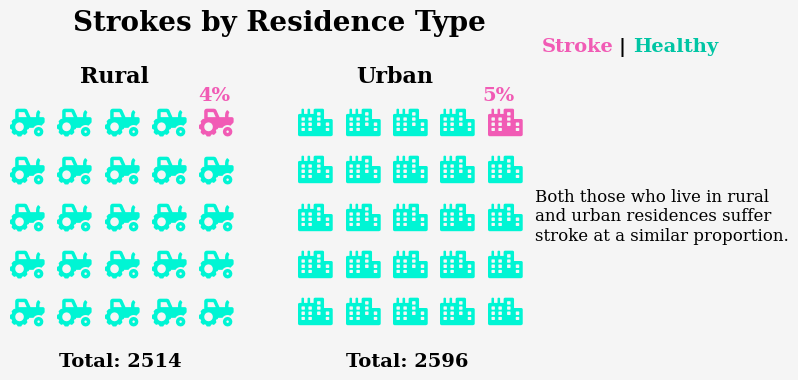

In [15]:
rural_total = stroke_data.groupby('Residence_type').Residence_type.count()['Rural']
per_rural_healthy = stroke_data[stroke_data.stroke==0].groupby('Residence_type').Residence_type.count()['Rural'] / rural_total
per_rural_stroke = stroke_data[stroke_data.stroke==1].groupby('Residence_type').Residence_type.count()['Rural'] / rural_total
rural_healthy = round(per_rural_healthy * 25, 0)
rural_stroke = round(per_rural_stroke * 25, )
urban_total = stroke_data.groupby('Residence_type').Residence_type.count()['Urban']
per_urban_healthy = stroke_data[stroke_data.stroke==0].groupby('Residence_type').Residence_type.count()['Urban'] / urban_total
per_urban_stroke = stroke_data[stroke_data.stroke==1].groupby('Residence_type').Residence_type.count()['Urban'] / urban_total
urban_healthy = round(per_urban_healthy * 25, 0)
urban_stroke = round(per_urban_stroke * 25, 0)



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f5f5f5',dpi = 100,
                 
                 plots = {121: 
                          {     
                           'rows':5,
                           'columns': 5,
                           'values' : [rural_healthy, rural_stroke],
                            'colors' : ['#00f5d4','#f15bb5'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'tractor',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 : 
                          { 
                            'rows': 5,
                            'columns':5,
                            'values':[urban_healthy, urban_stroke],         
                              'colors' : ['#00f5d4','#f15bb5'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'city',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)

fig.text(0.23, 0.75, 'Strokes by Residence Type', {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24, 0.675, 'Rural', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.21, 0.27, 'Total: ' + str(rural_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.635, 0.675, 'Urban', {'font':'Serif', 'weight':'bold','color': 'black', 'size':16})
fig.text(0.62, 0.27, 'Total: ' + str(urban_total), {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(0.41, 0.65, str(int(per_rural_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(0.815, 0.65, str(int(per_urban_stroke * 100)) + '%', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(.9, 0.72, 'Stroke', {'font':'Serif', 'weight':'bold','color': '#f15bb5', 'size':14})
fig.text(1.01, 0.72, '|', {'font':'Serif', 'weight':'bold','color': 'black', 'size':14})
fig.text(1.03, 0.72, 'Healthy', {'font':'Serif', 'weight':'bold','color': '#00c5a4', 'size':14})
fig.text(.89, 0.45, 
         'Both those who live in rural\nand urban residences suffer\nstroke at a similar proportion.', 
         {'font':'Serif', 'weight':'normal','color': 'black', 'size':12})

plt.show()

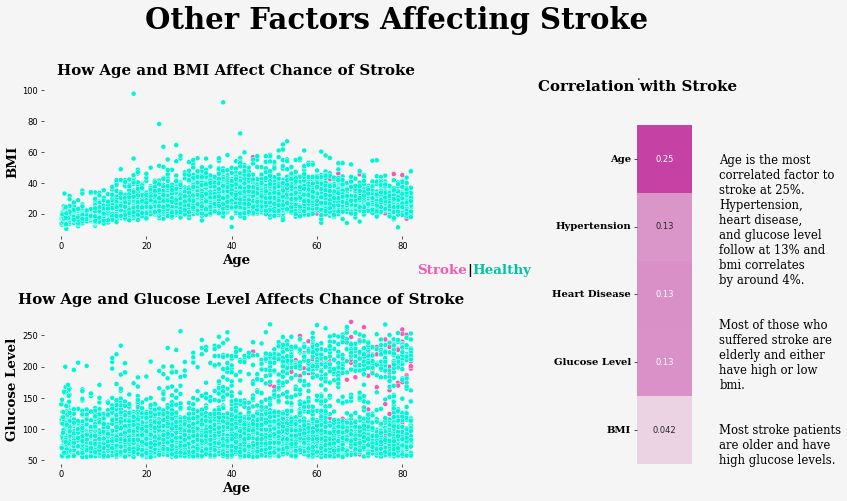

In [16]:
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['#00f5d4','#f15bb5']))

ax1 = fig.add_subplot(gs[2:6, 0:6])
ax2 = fig.add_subplot(gs[8:, 0:6])
ax3 = fig.add_subplot(gs[3:, 9:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.scatterplot(x='age', y='bmi', hue='stroke', data=stroke_data, ax=ax1)
ax1.get_legend().remove()
ax1.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.set_ylabel('BMI', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.text(-1, 110, 'How Age and BMI Affect Chance of Stroke', 
         {'font':'Serif', 'size':'18','color': 'black','weight':'bold'})

#-------Ax 2------------------------------------------------
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=stroke_data, ax=ax2)
ax2.get_legend().remove()
ax2.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.set_ylabel('Glucose Level', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(-10, 300, 'How Age and Glucose Level Affects Chance of Stroke', 
         {'font':'Serif', 'size':'18','color': 'black','weight':'bold'})

#-------Ax 3------------------------------------------------
cmap = sns.diverging_palette(10, 325, as_cmap=True)
sns.heatmap(pd.DataFrame(stroke_data.corr().iloc[:-1, -1]), cmap=cmap, annot=True, center=0, cbar=False)
ax3.set_xticks([-1], labels=[None])
ax3.set_yticklabels(labels = ['Age', 'Hypertension', 'Heart Disease', 'Glucose Level', 'BMI'],
                fontdict = {'font':'Serif', 'fontsize':12,'fontweight':'bold', 'color':'black'})
ax3.text(-1.8, -0.5, 'Correlation with Stroke', {'font':'Serif', 'size':'18','color': 'black','weight':'bold'})
ax3.text(0, -0.67, '.', 
         {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(-4,2.2,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax3.text(-3.1,2.2,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.text(-3, 2.2,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})
ax3.text(1.5, 5, 'Age is the most\ncorrelated factor to\nstroke at 25%.\nHypertension,\nheart disease,\n' +\
         'and glucose level\nfollow at 13% and\nbmi correlates\nby around 4%.\n\n\n' +\
         'Most of those who\nsuffered stroke are\nelderly and either\nhave high or low\nbmi.\n\n\n' +\
         'Most stroke patients\nare older and have\nhigh glucose levels.',
         {'font':'Serif', 'color': 'black', 'size':14})
#---------------------------------------------------------------
fig.text(0.12, 0.85, 'Other Factors Affecting Stroke', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

<a id="5"></a>
<h1 style = "font-size:50px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Data Preprocessing</h1>

<h5>Now that we better understand the data, the data can be processed to feed to the neural network. First catagoric variables will be one hot encoded. After this I will take care of the null values for bmi. The KNN imputer will be used to fill in the missing values -- basing the new values off of similar patients. After that, the numeric variables will be scaled. Next, SMOTE will be used to increase the number of data points that are of the positive class (stroke). Finally, the data set will be split into train, validation and test datasets.</h5>

In [17]:
#removes labels from dataset
X, y = stroke_data.drop('stroke', axis=1).values, stroke_data['stroke'].values

#Encodes catagoric variables
cat_ix = [0, 4, 5, 6, 9] #index of catagoric variables
cat_ct = ColumnTransformer([
    ('cat_vars', OneHotEncoder(), cat_ix)
], remainder='passthrough')
X_encoded = cat_ct.fit_transform(X)

#Impute missing values
#create KNN imputer object
knn_imp = KNNImputer(n_neighbors=5)
X_imputed = knn_imp.fit_transform(X_encoded)

#Scale Numeric Variables
num_ix = [16, 19, 20] #index of numeric variables
num_ct = ColumnTransformer([
    ('num_vars', StandardScaler(), num_ix)
], remainder='passthrough')
X_scaled = num_ct.fit_transform(X_imputed)

#displays scaled data
print('Example of Processed Data:')
print(X_scaled[0])

Example of Processed Data:
[1.05143428 2.70637544 0.98721932 0.         1.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.         1.         0.         1.         0.
 0.         0.         1.        ]


In [18]:
#Splits the data into train, test, validate
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=8)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=8)

#displays the amount of samples in each dataset
print('Samples in Train Set:', len(X_train))
print('Samples in Validation Set:', len(X_val))
print('Samples in Test Set:', len(X_test))

Samples in Train Set: 3577
Samples in Validation Set: 766
Samples in Test Set: 767


In [19]:
#SMOTE for class balancing
sm = SMOTE(random_state=8)

#create new training set with SMOTE object
X_bal, y_bal = sm.fit_resample(X_train, y_train)

#Displays perccent of each class
print('Initial Dataset')
print('Percent "stroke":', y_train.sum()/len(y_train))
print('Balanced Dataset')
print('Percent "stroke":', y_bal.sum()/len(y_bal))

Initial Dataset
Percent "stroke": 0.048364551299972046
Balanced Dataset
Percent "stroke": 0.5


<h5>Now the data is clean and the dataset is perfectly balanced. Time to work on the neural network!</h5>

<a id="6"></a>
<h1 style = "font-size:50px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Creating the Neural Network</h1>


In [20]:
#builds the architecture for a neural network
#creates a dense network with 1 skip step
inputs = keras.Input(shape=(21,))
a = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.6)(a)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.concatenate([a, x])
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.6)(x)
output = layers.Dense(1, activation='sigmoid')(x)

nn = keras.Model(inputs, output, name="stroke_predictor")
nn.summary()

Model: "stroke_predictor"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 21)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           1408        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 64)           0           dense[0][0]                      
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          8320        dropout[0][0]                    
___________________________________________________________________________________


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

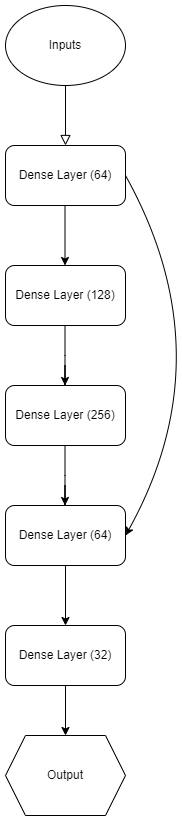

<h5>This architecture contains 5 dense layers and a skip connection in order to not lose any of the more simple connections while building more complex connections.</h5>

In [21]:
#compiles the model with Adam optimizer
nn.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
            loss='binary_crossentropy', metrics=['accuracy'])
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

#Trains the neural network
history = nn.fit(X_bal, y_bal, epochs=1000, callbacks=[early_stopper], validation_data=(X_val, y_val), verbose=0)

2022-02-01 11:18:02.540666: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


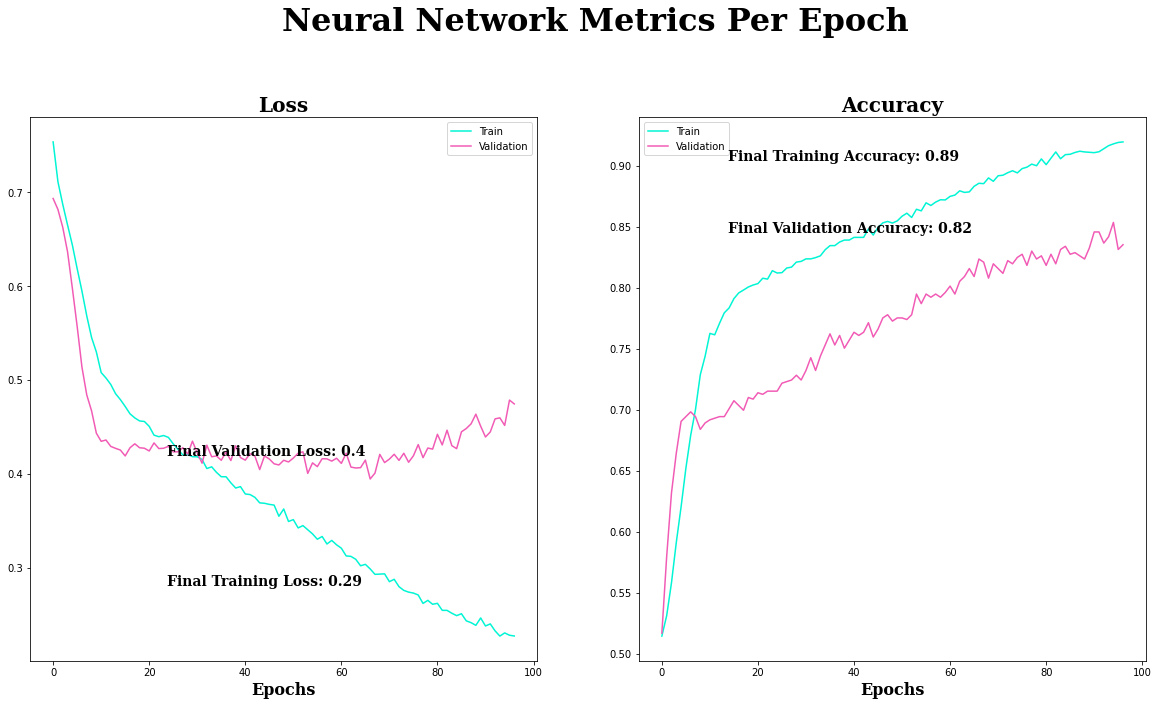

In [22]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
min_val_loss = round(history.history['val_loss'][-30], 2)
min_train_loss = round(history.history['loss'][-30], 2)

val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
max_val_acc = round(history.history['val_accuracy'][-30], 2)
max_train_acc = round(history.history['accuracy'][-30], 2)

#plots the training vs validation loss and accuracy
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.set_title('Loss', {'font':'Serif', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax1.set_xlabel('Epochs', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.plot(train_loss, label='Train')
ax1.plot(val_loss, label='Validation')
ax1.legend()

fig.text(0.22, 0.23, 'Final Training Loss: ' + str(min_train_loss),
         {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'})
fig.text(0.22, 0.41, 'Final Validation Loss: ' + str(min_val_loss), 
         {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'})

ax2.set_title('Accuracy', {'font':'Serif', 'fontsize':20,'fontweight':'bold', 'color':'black'})
ax2.set_xlabel('Epochs', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.plot(train_acc, label='Train')
ax2.plot(val_acc, label='Validation')
ax2.legend()

fig.text(0.61, 0.82, 'Final Training Accuracy: ' + str(max_train_acc),
         {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'})
fig.text(0.61, 0.72, 'Final Validation Accuracy: ' + str(max_val_acc), 
         {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'})

fig.text(0.3,1, 'Neural Network Metrics Per Epoch', {'font':'Serif', 'fontsize':32,'fontweight':'bold', 'color':'black'})
plt.show()

<h5>Now time to evaluate the model on the test data.</h5>

In [23]:
#Display the metrics of the neural network on the test set
test_preds = nn.predict(X_test)
threshold = 0.25
test_preds = [1. if i > threshold else 0. for i in test_preds]
test_acc = accuracy_score(y_test, test_preds)
test_rec = recall_score(y_test, test_preds)
test_pre = precision_score(y_test, test_preds)
print('Test Set Metrics')
print('Model Accuracy:', test_acc)
print('Model Recall:', test_rec)
print('Model Precision:', test_pre)

Test Set Metrics
Model Accuracy: 0.7548891786179922
Model Recall: 0.6410256410256411
Model Precision: 0.12562814070351758


<h5>With a threshold of 0.25, a majority of at risk patients were identified. This decreased the accuracy to around 70% and will lead to around 30% of patients being falsley identified as at risk. These are acceptable numbers for the this problem.</h5>

<a id="7"></a>
<h1 style = "font-size:50px; font-family:Georgia ; font-weight : normal; background-color: #f5f5f5 ; color : #00bbf9; text-align: center; border-radius: 100px 100px;">Conclusion</h1>
</br>
</br>
<ul>
    <li><strong>Age is a major risk factor for stroke.</strong> As we get older we are more at risk to suffer a stroke.</li>
    <li><strong>Males and females both suffer stroke at a similar rate.</strong> However, females have been shown to suffer strokes at younger ages than males.</li>
    <li><strong>Heart problems like hypertension and heart disease greatly increase the risk of stroke.</strong></li>
    <li><strong>People who have been married are at a higher risk of stroke.</strong> This may be due to higher levels of stress that occur during married life.</li>
    <li><strong>Working with children or not working at all seems to lower the risk of stroke.</strong> This may be because working with children or not working causes less stress.</li>
    <li><strong>The predictive model will identify most (71%) at risk patients.</strong> This does come at the cost of a somewhat lower accuracy (71%), but in this situation it is better to have a higher false positive rate than  a false negative rate.</li>
<ul>